In [13]:
import os
import pickle 
import pandas as pd
import numpy as np
import tixti_utils as tut
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.ndimage import gaussian_filter1d

In [114]:
big_df = pd.DataFrame()
for CATEGORY in ['face', 'body', 'object']:
    test_df = pd.read_pickle(f'../../datasets/NNN/{CATEGORY}_ed.pkl')
    test_df = test_df.groupby('ROI').filter(lambda x: not x.isna().any().any())
    big_df = pd.concat([big_df, test_df])

# extract per-roi global ED baseline
g = (
    big_df[big_df['Method'] == 'global']
    .loc[:, ['ROI', 'ED']]
    .rename(columns={'ED': 'ED_global'})
)

# merge baseline into full df
df = test_df.merge(g, on='ROI', how='left')

# compute percent change relative to each ROI's own global baseline
df['percent_change'] = (df['ED'] - df['ED_global']) / df['ED_global'] * 100

# drop global, we only care about local + shuf relative changes
df_rel = df[df['Method'] != 'global'].copy()
roi_agg = (df_rel.groupby(['ROI', 'Method'])['percent_change'].median().reset_index())

idx = roi_agg.groupby('Method')['percent_change']

extrema = pd.DataFrame({
    'min_val': idx.min(),
    'max_val': idx.max(),
    'mean_val': idx.mean(),
    'std_val': idx.std(),
})

print(extrema)

          min_val    max_val   mean_val    std_val
Method                                            
local  -45.587592   8.225206 -21.771211  17.901449
shuf   -38.634003  13.618177  -4.197050  12.493181


          min_val   min_roi    max_val    max_roi
Method                                           
local  -45.587592  LPP4_1_O   8.225206  CLC3_13_O
shuf   -38.634003  AO2_24_O  13.618177   AO5_25_O


/var/folders/nz/k0v468mj4w5_mx5nsmsgbwwc0000gq/T/ipykernel_60413/1864431221.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


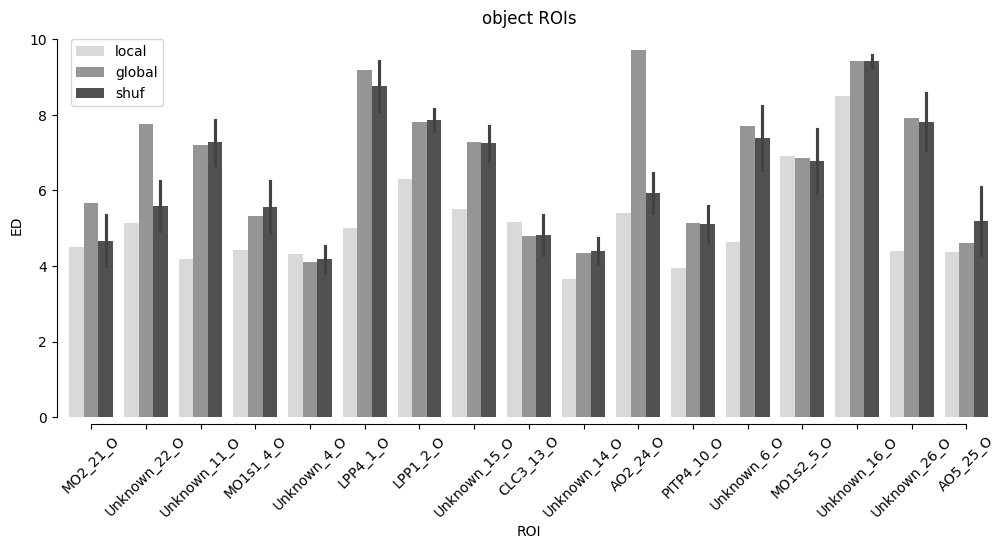

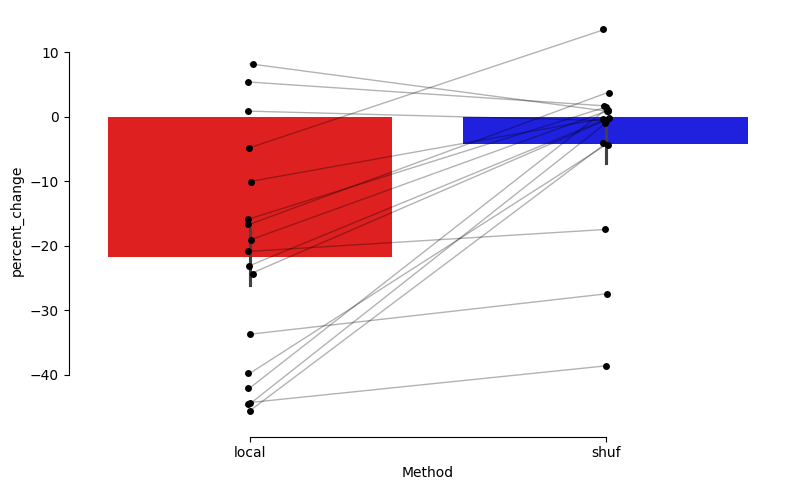

In [108]:
CATEGORY = 'object'
test_df = pd.read_pickle(f'../../datasets/NNN/{CATEGORY}_ed.pkl')
test_df = test_df.groupby('ROI').filter(lambda x: not x.isna().any().any())

# set the colors
# customp = ['red', 'gray', 'blue']
customp = sns.color_palette('Greys', 3)

fig,ax = plt.subplots(1,1, figsize=(12, 5))
sns.barplot(test_df, x='ROI', y='ED', hue='Method', 
            errorbar='sd', palette=customp, ax=ax)
ax.legend()#.remove()
ax.tick_params('x', rotation=45)
ax.set_title(f'{CATEGORY} ROIs')
sns.despine(fig=fig, trim=True, offset=5)

# extract per-roi global ED baseline
g = (
    test_df[test_df['Method'] == 'global']
    .loc[:, ['ROI', 'ED']]
    .rename(columns={'ED': 'ED_global'})
)

# merge baseline into full df
df = test_df.merge(g, on='ROI', how='left')

# compute percent change relative to each ROI's own global baseline
df['percent_change'] = (df['ED'] - df['ED_global']) / df['ED_global'] * 100

# drop global, we only care about local + shuf relative changes
df_rel = df[df['Method'] != 'global'].copy()
roi_agg = (df_rel.groupby(['ROI', 'Method'])['percent_change'].median().reset_index())

# plot: bars = mean over rois, dots = each roi
# each shuf ROI is a median of 500 bootstraps
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
sns.barplot(
    data=roi_agg, x='Method', y='percent_change',
    errorbar='se', palette=['red', 'blue'], ax=ax,
)

sns.stripplot(
    data=roi_agg, x='Method', y='percent_change', 
    color='black', jitter=0.01, alpha=1, ax=ax,
)

# add lines connecting points from the same roi
# relies on method ordering already in the plot
method_order = ['local', 'shuf']
method_to_x = {m: i for i, m in enumerate(method_order)}

for roi, sub in roi_agg.groupby('ROI'):
    xs = [method_to_x[m] for m in sub['Method']]
    ys = sub['percent_change'].values
    ax.plot(xs, ys, color='black', alpha=0.3, lw=1)


sns.despine(fig=fig, trim=True, offset=5)
plt.tight_layout()

idx = roi_agg.groupby('Method')['percent_change']

extrema = pd.DataFrame({
    'min_val': idx.min(),
    'min_roi': idx.idxmin().map(lambda i: roi_agg.loc[i, 'ROI']),
    'max_val': idx.max(),
    'max_roi': idx.idxmax().map(lambda i: roi_agg.loc[i, 'ROI']),
})

print(extrema)

In [42]:
out = (
    df_rel
    .groupby(['ROI', 'Method'])['percent_change']
    .agg(['mean', 'std'])
    .round(3)
)
print(out)

                      mean    std
ROI          Method              
AF3_18_F     local  -0.159    NaN
             shuf    0.010  0.044
AMC3_28_F    local  -0.255    NaN
             shuf    0.011  0.073
MF1_7_F      local  -0.479    NaN
             shuf    0.012  0.060
MF1_8_F      local  -0.392    NaN
             shuf    0.032  0.121
MF1_9_F      local  -0.431    NaN
             shuf    0.000  0.065
Unknown_19_F local  -0.507    NaN
             shuf   -0.006  0.086
Unknown_5_F  local  -0.294    NaN
             shuf   -0.026  0.133


In [ ]:
# some CONFIG parameters
RAND = 0
RESP = (50,220)
BASE = (-50,0)
ONSET = 50
RESP = slice(ONSET + RESP[0], ONSET + RESP[1])
BASE = slice(ONSET + BASE[0], ONSET + BASE[1])

df1 = pd.read_pickle('../../datasets/NNN/face_rdms.pkl')
df2 = pd.read_pickle('../../datasets/NNN/more_face_rdms.pkl')
df = pd.concat([df1, df2])

ROI_LIST = list(df['ROI'].unique())
cache = {
    row['ROI']: {k: row[k] for k in df.columns if k != 'ROI'}
    for _, row in df.iterrows()
}

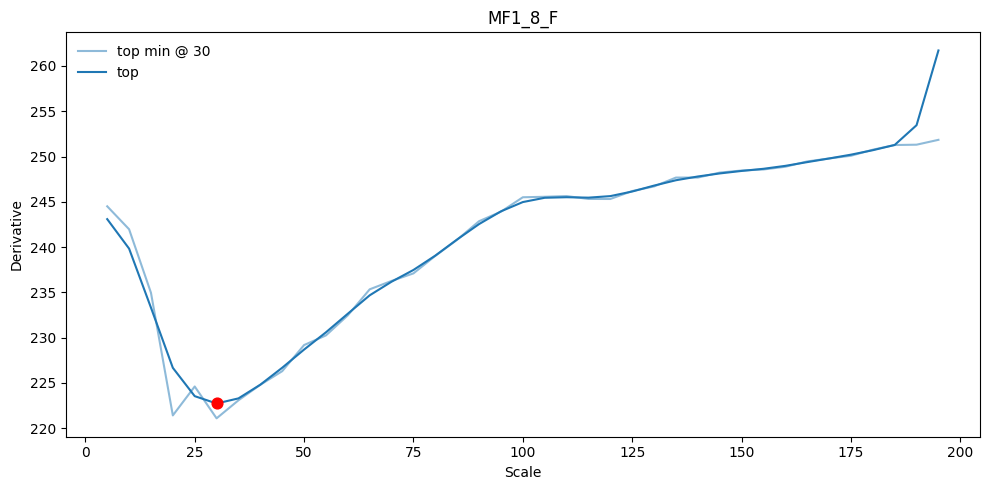

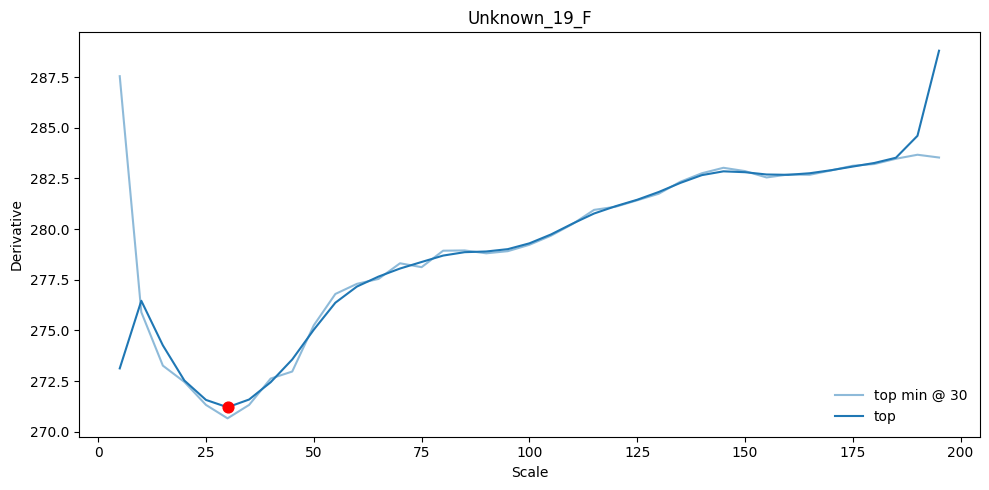

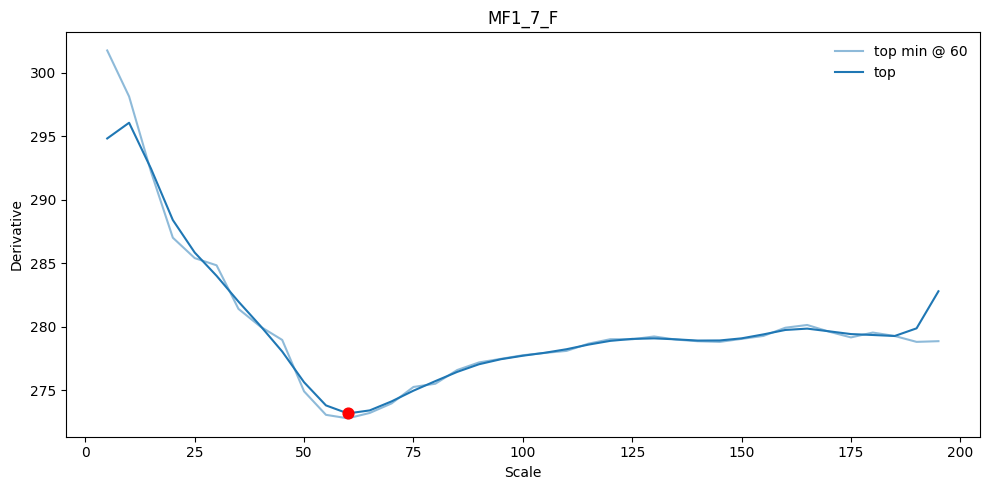

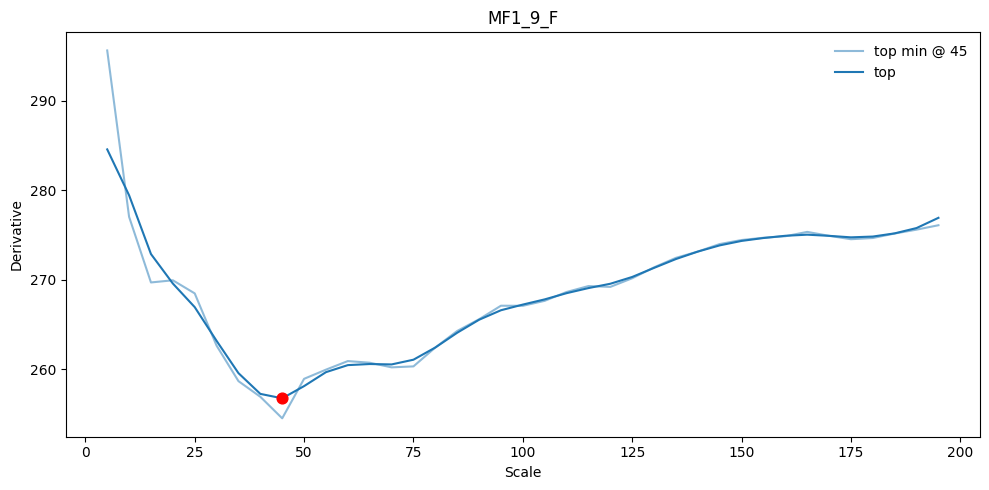

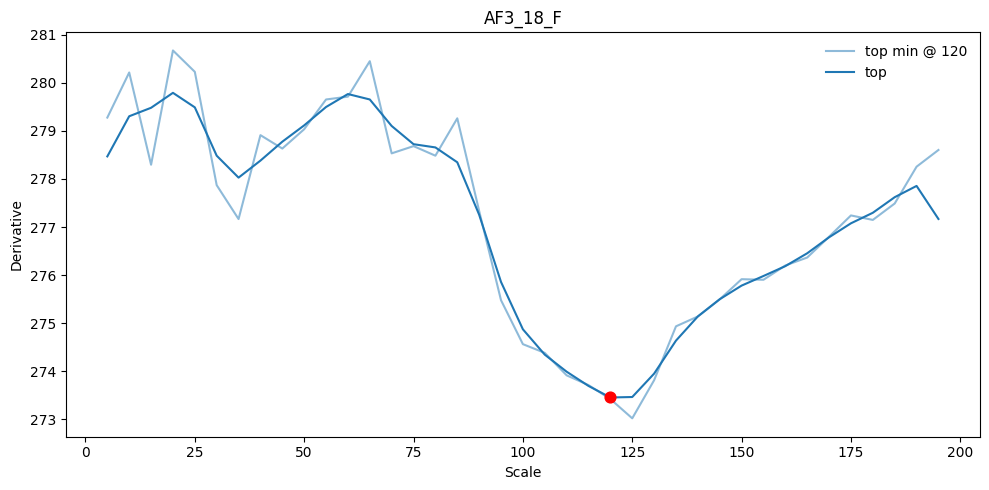

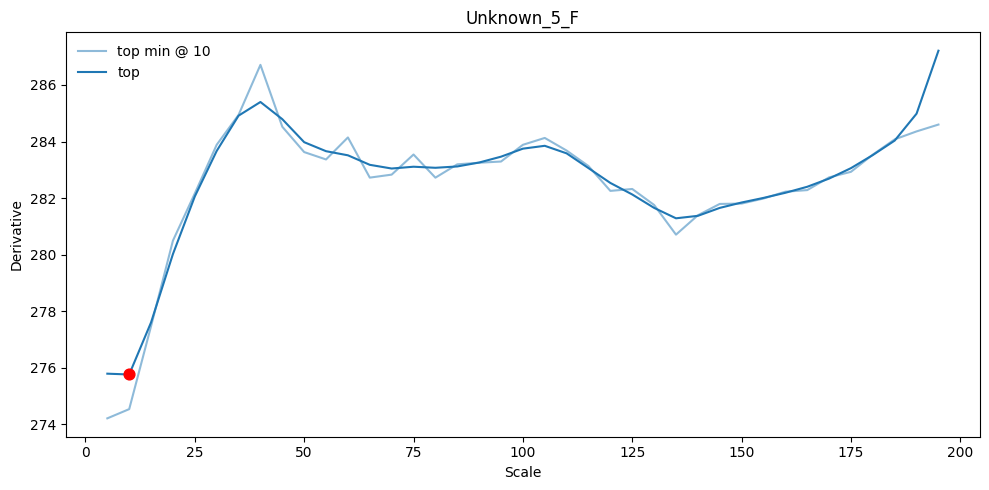

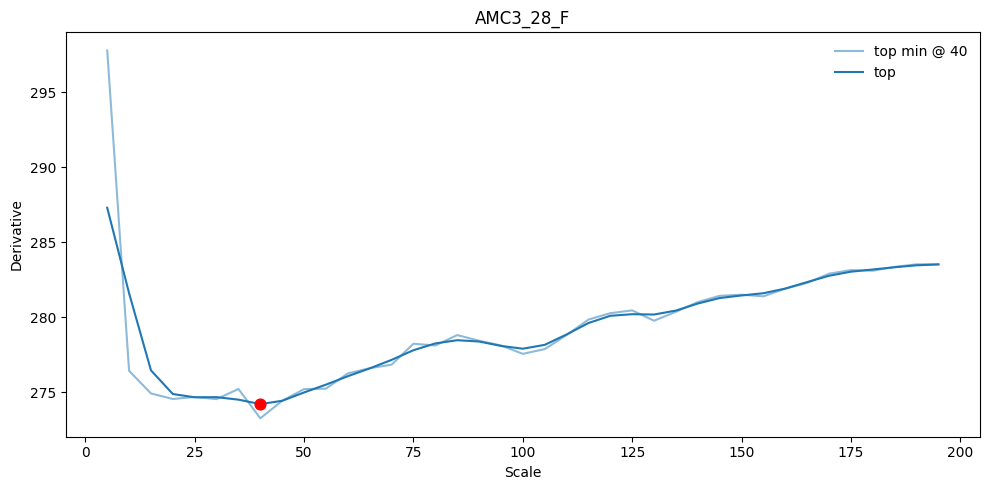

In [11]:
# step size of manifold scale used to calculate the L2 norm between two Time x Time RDMs
# L2_STEP >= STEP
L2_STEP = 5
cols = ['ROI', 'Scale', 'Derivative', 'Mode']
diffs = pd.DataFrame(columns=cols)
for _roi in ROI_LIST:
    roi_dict = cache[_roi]
    sizes = roi_dict['sizes_top']
   
    # the 'shuff' mode should really be bootstrapped...
    # but 'shuff' is not used to calculate the optimal k, so here it is just for visualization
    for mode in ['top']:
        rdms = roi_dict[f'{mode}_rdms']
        triu = np.triu_indices_from(rdms[0], k=1)

        ## single time point RDM, or average over previous time step chunk
        # R0 = rdms[step][triu]
        R0 = np.mean(np.array([rdm[triu] for rdm in rdms[0:L2_STEP]]), axis=0) #######################################
        for k in np.arange(1*L2_STEP, len(rdms), L2_STEP):
            prev = R0
            ## same as above
            # R0 = rdms[t-1][triu]
            R0 = np.mean(np.array([rdm[triu] for rdm in rdms[k:k+L2_STEP]]), axis=0) ######################################
    
            ## difference metric for scale K
            ## this is L2
            diff = np.sqrt(np.sum((R0)**2))
    
            diffs.loc[len(diffs)] = {'ROI': _roi, 'Scale': sizes[k-1], 'Derivative': diff, 'Mode': mode}

# apply smoothing function (not necessary)
diffs["diff_smooth"] = diffs["Derivative"].groupby(diffs["Mode"]).transform(
    lambda v: gaussian_filter1d(v, sigma=1)
)

# collect optimal K for each ROI
mins = {}
for r in ROI_LIST:
    fig, ax = plt.subplots(1, 1, figsize=(10, 5))

    d = diffs[diffs['ROI'] == r]

    # main lineplot
    sns.lineplot(data=d, x='Scale', y='Derivative', hue='Mode', alpha=0.5, ax=ax)
    sns.lineplot(data=d, x='Scale', y='diff_smooth', hue='Mode', ax=ax)

    # add red dot + legend label for each Mode separately
    labels  = list(ax.get_legend_handles_labels()[1])

    for i, mode in enumerate(['top']):
        dm = d[(d['Mode'] == mode)]
        idx_min = dm['diff_smooth'].idxmin()
        if np.isnan(idx_min):
            continue
        x_min   = dm.loc[idx_min, 'Scale']
        y_min   = dm.loc[idx_min, 'diff_smooth']

        # draw red dot
        mins[r] = (x_min, y_min)
        h = ax.scatter(x_min, y_min, color='red', s=60, zorder=5)

        # label for legend
        labels[i] = f'{mode} min @ {int(x_min)}'

    # PLOT RESULTS
    ax.legend(ax.get_legend_handles_labels()[0], labels, frameon=False)
    ax.set_title(r)
    plt.tight_layout()
    plt.show()

In [15]:
with open('../../datasets/NNN/face_mins.pkl', 'wb') as f:
    pickle.dump(mins, f)